In [1]:
import pandas as pd
import jieba 
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager

In [2]:
## ËØªÂÖ•È´òÁ´ØÊâãÊú∫ÁöÑÊï∞ÊçÆ
data = pd.read_csv('./high.csv',encoding='utf-8')
## ËØªÂÖ•‰∏≠Á´ØÊâãÊú∫ÁöÑÊï∞ÊçÆ
## data = pd.read_csv('./mid.csv',encoding='utf-8')
##ËØªÂÖ•‰ΩéÁ´ØÊâãÊú∫ÁöÑÊï∞ÊçÆ
##data = pd.read_csv('./low.csv',encoding='utf-8')

In [3]:
## Êü•ÁúãÊï∞ÊçÆ
data.head()

Êú∫Âûã                              IMEI          Êó•Êúü           Á±ªÂà´  \
0  X Flip  f4d3c8815c34764f6a39ddf816106424  2023-04-28  Áª≠Ëà™ËµõÈÅì_x0000_   
1  X Flip  6ef41eaacea279abdb33606f13ef5d3f  2023-04-28  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_   
2  X Flip  23d3f4919208d9414173c58c0869f47b  2023-04-28  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_   
3  X Flip  839735255dfbf22029d39a83712e5623  2023-04-28  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_   
4  X Flip  dd6330b527a900c07a3186214c6c4478  2023-04-28  ÊÄßËÉΩËµõÈÅì_x0000_   

                                                  ÊèèËø∞  
0  ÈúÄË¶ÅÊàëËøáÂéªÂÅö‰ªÄ‰πà‰πàÔºüÊàñËÄÖÊàëËΩ¨Ë¥¶Áªô‰Ω†‰Ω†Èó™ÈÄÅÊù•;Âç°ÈíàÊúâÊ≤°Êúâ;Â∏¶‰∏™Âç°Èíà;Â∞æÊ¨æÂ§öÂ∞ë;‰∏≠ÂõΩËÅîÈÄöÂ§ßÂé¶ÂåóÈó®...  
1  Â∑¶ËæπËøô‰∏™Âêß;Áé∞Âú®ÈÉΩÂèØ;711‰æøÂà©Â∫óÈó®Âè£Á≠âÂìà;Â•Ω;Âú®Âì™Ôºü;ÂèëÁÖßÁâáÁªôÊàëÁúãÁúã;ËøôÈáåÂè™ÊúâÂ∑¶Êãê;ËøôÈáåÂè™...  
2                                        ‰∏ªÈ¢ò‰∏çÈîô_x0000_  
3  imeiÁ†ÅÔºö*** 1„ÄÅÈóÆÈ¢òÁé∞Ë±°ÂèäÂ§çÁé∞Ê≠•È™§ÔºöX FlipÂ§ñÂ±è‰∏äÈù¢Ê≤°ÊúâÂ∞èÁ∫¢‰π¶ÔºåÂæàÂ§öËΩØ‰ª∂ÈÉΩÊ≤°ÊúâÔºå...  
4  ËøôÊ†∑‰πà;ÂìàÂìàÂìàËøòÊúâ‰∏Ä‰∏™ËßÜÈ¢ëÊ≤°ËøáÂéªÂë¢;Âí±‰ø©ËøòËßÜÈ¢ëÂòõ;ÁΩëÂç°;Â•Ω;ÁÑ∂ÂêéÂòû;ËøôÊ†∑‰πà;ËøôÊ†∑;‰πà;ÈúÄË¶ÅÊèí...

In [4]:
## Êï∞ÊçÆÂ§ßÂ∞è
data.shape

(73160, 5)

In [5]:
## Âà†Èô§Êó†Áî®Âàó
data.drop(columns = ["IMEI","Êó•Êúü"], inplace = True)

In [6]:
data.head(10)

Êú∫Âûã           Á±ªÂà´                                                 ÊèèËø∞
0  X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  ÈúÄË¶ÅÊàëËøáÂéªÂÅö‰ªÄ‰πà‰πàÔºüÊàñËÄÖÊàëËΩ¨Ë¥¶Áªô‰Ω†‰Ω†Èó™ÈÄÅÊù•;Âç°ÈíàÊúâÊ≤°Êúâ;Â∏¶‰∏™Âç°Èíà;Â∞æÊ¨æÂ§öÂ∞ë;‰∏≠ÂõΩËÅîÈÄöÂ§ßÂé¶ÂåóÈó®...
1  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  Â∑¶ËæπËøô‰∏™Âêß;Áé∞Âú®ÈÉΩÂèØ;711‰æøÂà©Â∫óÈó®Âè£Á≠âÂìà;Â•Ω;Âú®Âì™Ôºü;ÂèëÁÖßÁâáÁªôÊàëÁúãÁúã;ËøôÈáåÂè™ÊúâÂ∑¶Êãê;ËøôÈáåÂè™...
2  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_                                        ‰∏ªÈ¢ò‰∏çÈîô_x0000_
3  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  imeiÁ†ÅÔºö*** 1„ÄÅÈóÆÈ¢òÁé∞Ë±°ÂèäÂ§çÁé∞Ê≠•È™§ÔºöX FlipÂ§ñÂ±è‰∏äÈù¢Ê≤°ÊúâÂ∞èÁ∫¢‰π¶ÔºåÂæàÂ§öËΩØ‰ª∂ÈÉΩÊ≤°ÊúâÔºå...
4  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ËøôÊ†∑‰πà;ÂìàÂìàÂìàËøòÊúâ‰∏Ä‰∏™ËßÜÈ¢ëÊ≤°ËøáÂéªÂë¢;Âí±‰ø©ËøòËßÜÈ¢ëÂòõ;ÁΩëÂç°;Â•Ω;ÁÑ∂ÂêéÂòû;ËøôÊ†∑‰πà;ËøôÊ†∑;‰πà;ÈúÄË¶ÅÊèí...
5  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  ÊàëÊòØ‰πùÂçÅÂ≤ÅÂ∏¶Ê∞ßÂÜôÊñá(ÂæÆ‰ø°Ë¶Å‰∫§ÊâãÁª≠Ë¥π);[ÂæÆÁ¨ë][ÂæÆÁ¨ë];‰Ω†Â•Ω;ÊàëÂíãÁúã‰∏çÂà∞;‰ªñÂèëÁöÑÊ∂àÊÅØ;ÈÉΩÊòØÁôΩ...
6  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_                          ‰∏Ä‰ºöÊù•;Â∫óÈáåÁõ∏Êú∫Ëá™ÊãçÊòØ‰∏çÊòØË∞ÉËøáËÆæÁΩÆÂïä_x0000_
7  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_      ÊÇ®ÊääË¥üË¥£ÂäûÁêÜÊâãÊú∫Âç°ÈÇ£ÂßêÂßêÁîµËØùÂèëÊàëÂêß;ÂèëÁü≠‰ø°Â∫îËØ•‰∏çË°åÔºå‰ªñËÆ©ÊàëËá™Â∑±ÊâãÂÜô‰∏Ä‰∏™Áî≥ËØ∑‰π¶_x0000_
8  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  ;ÈÄöËÆØÂΩïÂíåÁÖßÁâáÊÄé‰πàÂØºÂïä;[OK];Ë°åÊàëËá™Â∑±Á†îÁ©∂‰∏ãÔºåÊàëÈ£ûÊú∫ËêΩÂú∞Â§™Êôö‰∫ÜÔºåÂ¶ÇÊûúÊï¥‰∏çÊòéÁôΩÔºåÊòéÂ§©ÁôΩÂ§©ËÅî...
9  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  Áî®Êà∑Êù•ÁîµË°®Á§∫ÊâãÊú∫Â§ñÈù¢Â∞èÂ±èÂæÆ‰ø°ÊòØÊ®™Â±èÔºåÈ≠îÈïúÊ∑ªÂä†ÁöÑËΩØ‰ª∂Âú®Â§ñÂ±èÈÉΩÊòæÁ§∫ÁöÑÊòØÁ´ñÂ±èÔºåÊÄé‰πàËÆæÁΩÆ‰∏∫Ê®™Â±è„ÄÇË∑üÂí®...

In [7]:
## Êü•ÁúãÊï∞ÊçÆÁ±ªÂûãÔºåËÉΩÂê¶ËΩ¨Êç¢
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73160 entries, 0 to 73159
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Êú∫Âûã      73160 non-null  object
 1   Á±ªÂà´      73160 non-null  object
 2   ÊèèËø∞      73118 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
## Êü•ÁúãËøôÁßçÊú∫ÂûãÁöÑÁ±ªÂà´ËµõÈÅì
data["Á±ªÂà´"].unique()

array(['Áª≠Ëà™ËµõÈÅì_x0000_', 'ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_', 'ÊÄßËÉΩËµõÈÅì_x0000_', 'ÂèëÁÉ≠ËµõÈÅì_x0000_', 'ÂÜÖÁΩÆÁ®ãÂ∫è',
       'ÊÄßËÉΩËµõÈÅì', 'ÂèëÁÉ≠ËµõÈÅì', 'Áª≠Ëà™ËµõÈÅì', 'ÁîüÁâ©ËØÜÂà´1_x0000_', 'Â§ñËßÇ‰ΩìÈ™å_x0000_', 'Â±èË£Ç_x0000_',
       'Ëß¶Êéß_x0000_', 'ÈÄöËØù_x0000_', 'Êó†Á∫øÁΩëÁªú_x0000_', 'Èü≥È¢ë_x0000_', 'ÂçáÁ∫ß_x0000_',
       'Â§ñËßÇËÆæËÆ°_x0000_', 'Â§ñËßÇÊùêÊñôÂèØÈù†ÊÄß_x0000_', 'Â§ñËßÇÁªìÊûÑÂèØÈù†ÊÄß_x0000_', 'Â§ñËßÇ‰ΩìÈ™å', 'Â§ñËßÇËÆæËÆ°',
       'Ëß¶Êéß', 'Èü≥È¢ë', 'ÂçáÁ∫ß', 'ÈÄöËØù', 'ÈÖç‰ª∂Ëµ†ÈÄÅ_x0000_', 'ÂÖÖÁîµ‰∏éÁîµÊ±†_x0000_', 'SIMÂç°‰∏éTFÂç°',
       'Êó†Á∫øÁΩëÁªú', 'ÁîüÁâ©ËØÜÂà´1', 'ÈÖç‰ª∂Ëµ†ÈÄÅ', 'Â§ñËßÇÊùêÊñôÂèØÈù†ÊÄß', 'ÂÜÖÂ≠òÂ≠òÂÇ®', 'SIMÂç°‰∏éTFÂç°_x0000_',
       'ÊåâÈîÆ_x0000_', 'Â±èÂπï_x0000_', 'ÂÜÖÂ≠òÂ≠òÂÇ®_x0000_', 'ÁßªÂä®ÁΩëÁªúËµõÈÅì_x0000_',
       'USBÁ∫ø_x0000_', 'Á°¨‰ª∂ÈÖçÁΩÆ_x0000_', 'ÊòæÁ§∫_x0000_', '‰º†ÊÑüÂô®_x0000_',
       'Á≥ªÁªüÊµÅÁïÖÊÄß_x0000_', 'ÁîµÊ±†ÁõñË£Ç_x0000_', 'Â±èÂπï', 'Á≥ªÁªüÊµÅÁïÖÊÄß', 'Â±èË£Ç', 'ÂÖÖÁîµ‰∏éÁîµÊ±†', '‰øùÊä§ËÜú',
  

In [9]:
## Êï∞ÊçÆÁ≠õÈÄâ ÂàÜÂà´Á≠õÈÄâÂá∫‰∏Ä‰∏™ÊâãÊú∫ÊúâÂÖ≥ÂÜÖÁΩÆÁ®ãÂ∫è ÊÄßËÉΩËµõÈÅì ÂèëÁÉ≠ËµõÈÅìÁöÑÊï∞ÊçÆ
data_value_type1 = data.loc[(data['Á±ªÂà´'].str.contains('ÂÜÖÁΩÆÁ®ãÂ∫è')), :]
data_value_type1.head(20)
#data_value_type1.info()

Êú∫Âûã           Á±ªÂà´                                                 ÊèèËø∞
1   X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  Â∑¶ËæπËøô‰∏™Âêß;Áé∞Âú®ÈÉΩÂèØ;711‰æøÂà©Â∫óÈó®Âè£Á≠âÂìà;Â•Ω;Âú®Âì™Ôºü;ÂèëÁÖßÁâáÁªôÊàëÁúãÁúã;ËøôÈáåÂè™ÊúâÂ∑¶Êãê;ËøôÈáåÂè™...
2   X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_                                        ‰∏ªÈ¢ò‰∏çÈîô_x0000_
3   X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  imeiÁ†ÅÔºö*** 1„ÄÅÈóÆÈ¢òÁé∞Ë±°ÂèäÂ§çÁé∞Ê≠•È™§ÔºöX FlipÂ§ñÂ±è‰∏äÈù¢Ê≤°ÊúâÂ∞èÁ∫¢‰π¶ÔºåÂæàÂ§öËΩØ‰ª∂ÈÉΩÊ≤°ÊúâÔºå...
5   X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  ÊàëÊòØ‰πùÂçÅÂ≤ÅÂ∏¶Ê∞ßÂÜôÊñá(ÂæÆ‰ø°Ë¶Å‰∫§ÊâãÁª≠Ë¥π);[ÂæÆÁ¨ë][ÂæÆÁ¨ë];‰Ω†Â•Ω;ÊàëÂíãÁúã‰∏çÂà∞;‰ªñÂèëÁöÑÊ∂àÊÅØ;ÈÉΩÊòØÁôΩ...
6   X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_                          ‰∏Ä‰ºöÊù•;Â∫óÈáåÁõ∏Êú∫Ëá™ÊãçÊòØ‰∏çÊòØË∞ÉËøáËÆæÁΩÆÂïä_x0000_
7   X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_      ÊÇ®ÊääË¥üË¥£ÂäûÁêÜÊâãÊú∫Âç°ÈÇ£ÂßêÂßêÁîµËØùÂèëÊàëÂêß;ÂèëÁü≠‰ø°Â∫îËØ•‰∏çË°åÔºå‰ªñËÆ©ÊàëËá™Â∑±ÊâãÂÜô‰∏Ä‰∏™Áî≥ËØ∑‰π¶_x0000_
8   X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  ;ÈÄöËÆØÂΩïÂíåÁÖßÁâáÊÄé‰πàÂØºÂïä;[OK];Ë°åÊàëËá™Â∑±Á†îÁ©∂‰∏ãÔºåÊàëÈ£ûÊú∫ËêΩÂú∞Â§™Êôö‰∫ÜÔºåÂ¶ÇÊûúÊï¥‰∏çÊòéÁôΩÔºåÊòéÂ§©ÁôΩÂ§©ËÅî...
9   X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  Áî®Êà∑Êù•ÁîµË°®Á§∫ÊâãÊú∫Â§ñÈù¢Â∞èÂ±èÂæÆ‰ø°ÊòØÊ®™Â±èÔºåÈ≠îÈïúÊ∑ªÂä†ÁöÑËΩØ‰ª∂Âú®Â§ñÂ±èÈÉΩÊòæÁ§∫ÁöÑÊòØÁ´ñÂ±èÔºåÊÄé‰πàËÆæÁΩÆ‰∏∫Ê®™Â±è„ÄÇË∑üÂí®...
10  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_                                        ÂñúÊ¨¢Â£ÅÁ∫∏_x0000_
12  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  ÊàëÁ≠âÊàëËÄÅÂÖ¨Â§ßÊ¶Ç11ÁÇπÂá†;ÊîØ‰ªòÂÆùÂèØÂê¶Áî®ÊàëÊâãÊú∫ÁôªÂΩï;ÂèØ‰ª•ÁöÑÔºåÊàëÂ∞±‰∏ÄÈòµËøáÂéª;ÊàëÊÉ≥ÈóÆ‰∏Ä‰∏ãÈïúÂ§¥ÊúâÊó†Â±è‰øù...
13  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_              ‰ªäÂ§©28Âè∑‰∫ÜÔºåÊÄé‰πàËøòÊ≤°Ê∂àÊÅØ;Ë°åÔºåÊàë‰∏ãÂçàËøáÂéª;‰∏ãÂçàÂéª;ÁªôÊàëÁïôÁùÄ_x0000_
14  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_    Â§ñÂ±èÊÄé‰πàËÆæÁΩÆÂ∫îÁî®;Â§ñÂ±èÊÄé‰πàÊääÂ∫îÁî®ÁÇπÂá∫Êù•;Âè™ÊúâËøôÂá†‰∏™Â∫îÁî®;Â§ñÂ±èÁöÑÈÇ£‰∏™Â∞èÂä®Áâ©ÊÄé‰πàÂºÑÁöÑ_x0000_
15  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  Âú®‰πà;ÊàëËøô‰∏™Âä†ÂØÜÁöÑÈó®Á¶ÅÂç° ‰ªñËÄç‰∏ç‰∫Ü;ËØ¥‰∫Ü12.30Â∑¶Âè≥ÊâçÊèíÁöÑÂç°;‰Ω†Áúã ËÄóÁîµÊó∂Èó¥‰∏çÂ∞±Áü•ÈÅì‰∫ÜÈòø;...
17  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_                            Â§ñÂ±èÁöÑÂ£ÅÁ∫∏ÊòØÂú®Âì™ÈáåËÆæÁΩÆÁöÑÂëÄ;Â•ΩÂìí_x0000_
18  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_                                    Ëøô‰∏™Â≠ó‰ΩìÈ¢úËâ≤Â•ΩÁúã_x0000_
19  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_                                        Á∫∏Â£ÅÂ•ΩÁúã_x0000_
20  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  ‰∏ãËΩΩ‰∏Ä‰∏™ ‰∫í‰º†App;@„ÄÇ„ÄÇ„ÄÇ‚ÄÖ[Âº∫][Âº∫][Âº∫];@Œ∂‡∏± ‚òÄ Â§±Êó†ÊâÄÂ§±„ÄÇ‚ÄÖÁßÅËÅäÊÇ®‰∫Ü_x0000_
21  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  3200ËøòÊòØ3300Ôºü;Âçñ;ÊàëÁ™ÅÁÑ∂ÊÉ≥Ëµ∑Êù•ÔºåÊî∂ÊçÆÊ≤°ÊúâÁªôÊàë;ËøòÊúâËµ†ÂìÅÊòØ‰∏çÊòØËøòÊúâ‰∏™ÂÖÖÁîµÂÆùÔºüÁÑ∂ÂêéÊàë‰ª¨...
22  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_  ‰∏ãÁè≠ËøáÊù•Âë¢;‰∫îÁÇπÂ§öÂêß;‰Ω†‰∫îÁÇπÂ§öÂú®Âêó;Â•ΩÁöÑ;ÂóØÔºü6ÁÇπÂï•Ôºü;Âô¢Âô¢Âô¢Â•ΩÁöÑ;ÊàëË¶ÅÂçñÁöÑÈÇ£‰∏™ ÁÖßÁâáÂ∑≤ÁªèÁîµ...
24  X Flip  ÂÜÖÁΩÆÁ®ãÂ∫è_x0000_                     ÂàöÊâçÊàëÈÄâÁöÑ1199Âª∂‰øùÈ°πÁõÆÂõæÁâáÂÜçÂèëÊàë‰∏ã;Âìà;Â•Ω_x0000_

In [10]:
data_value_type2 = data.loc[(data['Á±ªÂà´'].str.contains('Áª≠Ëà™ËµõÈÅì')), :]
data_value_type2.head(20)
#data_value_type2.info()

Êú∫Âûã           Á±ªÂà´                                                 ÊèèËø∞
0    X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  ÈúÄË¶ÅÊàëËøáÂéªÂÅö‰ªÄ‰πà‰πàÔºüÊàñËÄÖÊàëËΩ¨Ë¥¶Áªô‰Ω†‰Ω†Èó™ÈÄÅÊù•;Âç°ÈíàÊúâÊ≤°Êúâ;Â∏¶‰∏™Âç°Èíà;Â∞æÊ¨æÂ§öÂ∞ë;‰∏≠ÂõΩËÅîÈÄöÂ§ßÂé¶ÂåóÈó®...
16   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_            ËøôÁâàÊú¨Áª≠Ëà™ÊúâÂæÖ‰ºòÂåñÂì¶ ÂàöÂÖÖÊª°ÊâãÊú∫ÊâìÂºÄÊâì‰∫Ü‰∏§‰∏™Â≠óÁîµÈáèÂ∞±Âà∞99‰∫Ü ?_x0000_
35   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  @Èò¥Â§©Âø´‰πê‚ÄÖÂÖÑÂºüÂà´Áúã‰∫Ü‰∏çÁÆ°ÈáåÈù¢ÊúâÊ≤°ÊúâÁî∑ÁöÑÂèçÊ≠£‰π∞ÊâãÊú∫‰πüÊ≤°Âá†‰∏™‰∫∫[ÊçÇËÑ∏];Ëøô‰∏™‰∏≠Âï•‰∫ÜÂïä[ËÆ©ÊàëÁúãÁúã...
42   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_                                ‰Ω†ËØ¥ÁöÑÂØπ„ÄÇÂ§ßÁîµÊ±†ÊâçÊòØÁéãÈÅì_x0000_
44   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  Êú∫Â≠êÈùûÂ∏∏Ë≤åÁæéÔºå‰∏äÊâã‰ΩìÈ™åÊàëÊâøËÆ§È´ò‰º∞‰∫Ü‰ªñÔºåÂæÆ‰ø°Â∞èÊ∏∏ÊàèÂ±ÖÁÑ∂Ëøò‰∏çËÉΩÂÆåÂÖ®ÂåπÈÖçÔºåÂÆ£‰º†ÁöÑÂ∞èÁ∫¢‰π¶ÂåπÈÖç‰ΩÜÊòØ‰∏çËÉΩ...
47   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_                                    ‰∏ÄÂ§©Â§ßÁ∫¶ÂÖÖ‰∏§Ê¨°Áîµ_x0000_
50   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  vivo XFlipËøòÈÖçÂ§áÊúâÂ§ßÂÆπÈáèÁöÑÁîµÊ±†ÔºåÁª≠Ëà™Êó∂Èó¥ÂæàÈïøÔºåÊàë‰∏ÄÂ§©‰ΩøÁî®‰∏ãÊù•ÔºåËøòÊúâÂ§ßÁ∫¶20%ÁöÑÁîµÈáè...
56   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_                                        Áª≠Ëà™ÂíãÊ†∑_x0000_
60   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  Â∫óÈïøÔºåÂÖÖÁîµÁöÑÊó∂ÂÄôÔºåÊâãÊú∫ÊäòÂè†ÂêéÁöÑÈáëÂ±ûÂ§ÑÊúâÁÇπÊºèÁîµÁöÑÊÑüËßâ[Â∞¥Â∞¨];‰∏ç‰ºö;‰πü‰∏ç‰∏•ÈáçÂêßÔºåÂ∞±ÊòØÊâãÊåáÊë∏‰∏äÂéª...
62   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  ÊÇ®Â•Ω;ÊàëÊâãÊú∫ÂÖÖ‰∏ÄÂÆøÁîµÊÄé‰πàÁôæÂàÜ‰πã99ÁîµÂëÄ;ÊâÄ‰ª•‰ªñÂ∞±‰∏ç100‰∫ÜÔºü;Â•Ω;Ëøô‰∏™ÂØπÂÖÖÁîµÊúâÂΩ±Âìç;Êàë‰ªéÊò®Â§©...
81   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  ËøòÊ≤°Â•Ω;‰∏äÈù¢ÁöÑÈóÆÈ¢òËøòÊ≤°Ëß£ÂÜ≥;xflipË¥≠‰π∞care ÁîµÊ±†ÊòØ‰∏çÊòØ‰øù2Âπ¥Ôºü;ÈÇ£‰∏∫‰ªÄ‰πàË¥≠‰π∞‰∫ÜÂÆ¢Êúç‰∏≠...
83   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_                              ‰∫≤ÔºåÊâãÊú∫Â§öÂ∞ëÁîµÔºüÊâçÂèØ‰ª•ÂÖÖÁîµÔºü_x0000_
99   X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  Êò®Â§©‰π∞‰∫ÜX FlipÔºåÊúâÊòæÁ§∫Âø´ÂÖÖÔºåÂÖÖÁîµÁöÑÊó∂ÂÄô‰∏§‰∏™Â∞èÊó∂ÊâçËÉΩÂÖÖÊª°ÔºåÂ§öÊ¨°ÊµãËØïÈÉΩËøôÊ†∑ÔºåÊåâKM ÂÖÖÁîµÊó∂...
111  X Flip  Áª≠Ëà™ËµõÈÅì_x0000_                                     ÁîµÊ±†Áª≠Ëà™ÊÄé‰πàÊ†∑_x0000_
113  X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  Êò®Â§©Ê∏∏Êàè‰ªäÊó•‰ª•ÂºÄÂ•ñÔºåÁî®Âí±‰ª¨ÊúÄÊñ∞Ê¨æXFlipÊãçÁöÑÂì¶üòäÊÅ≠Âñú@Â∞èÂß¨ÂêÉ‰∏çËÉñüçî‚ÄÖ@ÊùéÂÖàÊ£Æi‚ÄÖËé∑ÂæóÂ•ñÂä±Ôºå...
114  X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  Ëøô‰∏™Â∞èÊäòÂè†ÊòØÁúüÁöÑÂ•ΩÁúãÂèàÂ•ΩÁî®ÔºåËøô‰∏™Â§ñÂ±èÂèØ‰ª•‰∏çÁî®ÊâìÂºÄÈáåÈù¢ÁöÑÂÜÖÂ±èÔºåÂú®Â§ñËæπÂ∞±ÂèØ‰ª•ÁúãÂæÆ‰ø°ÂíåÊäñÈü≥ÔºåÁâπÂà´Êñπ...
118  X Flip  Áª≠Ëà™ËµõÈÅì_x0000_                               Âä†Âº∫ÂæÖÊú∫Áª≠Ëà™ÔºåÂÖÖÁîµÊñπÈù¢Êó†Á∫ø_x0000_
123  X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  Êàë‰∏çÂñúÊ¨¢ÈïøÁØáÂ§ßËÆ∫Ôºå[face:024:0]ÊàëÊòØ‰∏™ÊãçÁÖßËææ‰∫∫ÔºåÈ¢úÂÄºÊéßÊàëÂñúÊ¨¢XFLipÊäòÂè†Â±èÔºåÁâπÂà´...
124  X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  Áé∞Âú®ÁªôÂ§ßÂÆ∂ÂÖ¨Â∏ÉÊò®Â§©Êôö‰∏äÁåúÊú∫ÂûãÁöÑÊ≠£Á°ÆÁ≠îÊ°àÂì¶ÔºÅÊ≠£Á°ÆÁ≠îÊ°àÊòØXFlip;Ë∞¢Ë∞¢‰Ω†ÁöÑÂ•ΩËØÑ;[Áà±ÂøÉ]4.3...
128  X Flip  Áª≠Ëà™ËµõÈÅì_x0000_  @üïäÍßîÍ¶ø·≠ÑüíûÊâßÁùÄÍßîÍ¶ø·≠Ñüíûüïä‚ÄÖÂà∞Â∫óÈ¢ÜÂèñÁ§ºÂìÅüéÅ‰∏Ä‰ªΩÂì¶;Â§ßÂÆ∂Êó©‰∏äÂ•ΩÔºå4ÊúàÁ§æÁæ§ÊâìÂç°Á≠æÂà∞ÊôíÂõæüâëÈ¢ÜÁ§ºÂìÅÔºå...

In [11]:
data_value_type3 = data.loc[(data['Á±ªÂà´'].str.contains('ÊÄßËÉΩËµõÈÅì')), :]
data_value_type3.head(20)
#data_value_type3.info()

Êú∫Âûã           Á±ªÂà´                                                 ÊèèËø∞
4   X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ËøôÊ†∑‰πà;ÂìàÂìàÂìàËøòÊúâ‰∏Ä‰∏™ËßÜÈ¢ëÊ≤°ËøáÂéªÂë¢;Âí±‰ø©ËøòËßÜÈ¢ëÂòõ;ÁΩëÂç°;Â•Ω;ÁÑ∂ÂêéÂòû;ËøôÊ†∑‰πà;ËøôÊ†∑;‰πà;ÈúÄË¶ÅÊèí...
11  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ÊàëÂ∞±ÊÉ≥Ë¶ÅÊàëÂÆöÁöÑÈÇ£Ê¨æ;‰ªäÂ§©Ê≤°ÊúâÂäûÊ≥ïÁªôÊàëÁöÑËØùÔºå200ÈÄÄÊàëÂêß;Â•ΩÁöÑ;Ê≤°‰∫ã;Â•ΩÁöÑ;ÁúãÊù•ÂæàÊä¢ÊâãÂïä;ÊàëÂ∞±...
26  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ÊàëÊòØXFilpÊé®ËçêÂÆòÔºåÈ¶ñÂÖàvivo XFlipÂ±èÂπïÈááÁî®‰∫Ü6.74Ëã±ÂØ∏ÂÜÖÂ±èÂíå3.0Ëã±ÂØ∏ÁöÑÂ§ñÂ±èÁªÑ...
32  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_                      x flip ÁéãËÄÖ‰∏ªÊµÅÊ∏∏Êàè‰ªÄ‰πàÊó∂ÂÄôÊîØÊåÅÈ´òÂ∏ßÁéá_x0000_
33  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ‰∫≤Áà±ÁöÑvivoÂÆ∂‰∫∫‰ª¨‰∏ãÂçàÂ•Ω ‰ªäÊó•ÁöÑÁ¶èÂà©Êó∂Èó¥Âà∞Âï¶;‰ªäÊó•Á¶èÂà© 5AÊï∞ÊçÆÁ∫ø‰∏ÄÊ†π;[Âº∫]vivo X...
34  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_                        ‰∏∫‰ªÄ‰πà‰∏çÁî®ÊúÄÊñ∞Â§ÑÁêÜÂô®Ôºå‰∏∫‰ªÄ‰πà‰∏çÊòØÂ±èÂπïÊåáÁ∫π_x0000_
37  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ÊàëÊúÄÂñúÊ¨¢ÁöÑvivo X Flip Èì∞ÈìæÂÖàËøõÔºåÊåÅ‰πÖËÄêÁî®Âú®Èì∞ÈìæÂ∑•Ëâ∫ÊñπÈù¢Ôºåvivo X FilpÈÄâ...
48  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  X flipÂΩïÂà∂ËßÜÈ¢ëÂú®4kÂíå1080pÊ®°Âºè‰∏ãÈÄâÊã©60Â∏ßÊãçÊëÑËøòÊòØ‰∏ÄÁõ¥Â§Ñ‰∫é30Â∏ßÁöÑÁä∂ÊÄÅÔºåÁî®720...
59  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ÊàëÊòØXFlipÊé®ËçêÂÆò Â•Ω‰∫ßÂìÅÁî®ÊàêÁª©ËØ¥ËØùÔºÅÂÖ®ËÉΩÂ§ßÊäòÂè†vivo X Fold2 ÂíåÊúÄÁæéÂ∞èÊäòÂè†vi...
64  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  X FlipÊÑüËßâËôΩÁÑ∂ÊÄßËÉΩ‰∏äÊØîËµ∑‰ª•ÂâçÁöÑÁøªÁõñÊòØÂ§©Â∑ÆÂú∞Âà´‰∫ÜÔºå‰ΩÜËøôÂÆ£‰º†ÂõæÊÑüËßâÂ§öÂ∞ëÊúâÁÇπÂèçÊô∫„ÄÇ„ÄÇ„ÄÇ[fa...
65  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  filpÔºåÈªëËâ≤5999ÁöÑÊúâË¥ßÂêó;512ÁöÑÊòØÂ§öÂ∞ëÈí±;Ëøô‰∏™ÂÜÖÂ≠òÊàëËßâÂæóÊúâ‰∫õÂ§ß‰∫Ü;Â•ΩÁöÑÔºåÂà∞Êó∂Êâæ‰Ω†;Áîò...
67  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ‰Ω†Â•ΩÔºå‰ªäÂ§©Âà∞ÁöÑÂï•ÈÖçÁΩÆÈ¢úËâ≤Ôºü;[Ê±ó]ÊÄé‰πàÈÉΩÊòØÁ∫¢Ëâ≤ÁöÑ;Êàë‰∏çÁ°ÆÂÆöÈªëËâ≤ËøòÊòØËìùËâ≤ÔºåÊÉ≥ÈÄÅ‰∫∫ÁöÑÔºå‰∏äÊ¨°22Âè∑...
68  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  100;[Êä±Êã≥];Â•ΩÁöÑÔºåÊîæÂøÉÂêß;Âú®‰∏çÁæéÂ•≥ÔºåÊàëËøô‰∏™ÊâãÊú∫‰∏çÊÉ≥Ë¶Å‰∫ÜÔºå‰Ω†‰ª¨Êî∂Âêó„ÄÇ;ÂºÄËßÜÈ¢ëÂèçÂ∫îÂ§™ÊÖ¢ÔºåÂíå...
70  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  Ë∞¢Ë∞¢‰∫ÜÂìàÂìà;xflip‰∏ìÂ±ûÁöÑÊâãÊú∫Â£≥Âï•Êó∂ÂÄôÂà∞ÂëÄÔºüÂçïÁã¨ÂçñÁöÑÈÇ£Ê¨æ;Â∫óÈáåpad2ÊúâË¥ßÂêóÔºüÂíãÂçñÁöÑÂ§öÂ∞ëÈí±...
71  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_                               Â∞èÁ®ãÂ∫èÊó†Ê≥ï‰ΩøÁî®Â±èÂπïÈ´òÂà∑Êñ∞Áéá_x0000_
72  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ÊàëÂèëÁé∞‰ªñÊúâÈó™ÈÄÄËØ∂;ËôΩÁÑ∂Ê¨°Êï∞Â∞ë ‰ΩÜÊòØÂàöÊãøÂà∞Â∞±Èó™ÈÄÄ;‰ªäÂ§©ËøòÂèëÁé∞Â§ñÂ±èÂç°Â∏ß;ÂêéÊù•ÊâçÊÅ¢Â§ç;Êàë‰º∞ËÆ°‰πüÊ£ÄÊµã...
73  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  vivoÊù≠Â∑ûÂú∞ÈìÅÂç°ÊòØ‰∏çÊòØËøô‰∏™;‰Ω†Âú®Â∏ÆÊàëÁ°ÆËÆ§‰∏Ä‰∏ã;‰Ω†ÈóÆÈóÆ‰Ω†Â∫óÈïø;Áî®Ëøô‰∏™ÂèØ‰ª•ÊâìÊäòÁöÑ;‰∏çÁùÄÊÄ•ÔºåÊàë‰ªä...
76  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_  ÂâçË®ÄÔºövivo X FlipÊòØ‰∏ÄÊ¨æÊÄßËÉΩË°®Áé∞ÈùûÂ∏∏Â•ΩÁöÑÂÖ®Êñ∞Êú∫ÂûãÔºåËøôÊ¨æÊâãÊú∫ÁöÑ‰ª∑Ê†º‰πüÊòØÊØîËæÉ‰∏çÈîôÁöÑÔºå‰πü...
77  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_     ÊàëÊòØX FlipÊé®ËçêÂÆò ÊâãÊú∫Êî∂Âà∞ÔºåÂæàËΩªÔºåÂæàËñÑÔºåÊâãÊÑüÂ•ΩÔºåÊâãÊú∫ËøêË°åÈÄüÂ∫¶Âø´ÔºåÂÄºÂæóÊã•Êúâ_x0000_
86  X Flip  ÊÄßËÉΩËµõÈÅì_x0000_                                         ‰πüÂç°‰∫Ü_x0000_

In [12]:
## ÂèØ‰ª•ÂØπ‰∫éÊï¥‰ΩìÊú∫ÂûãÔºåÊèêÂèñÊèèËø∞ÂÜÖÂÆπÔºåÊàñËÄÖÊõ¥ÊîπÂèòÈáèÈÄâÂèñÂàÜÂâ≤Â•ΩÁöÑÂêå‰∏Ä‰∏™Êú∫ÂûãÁöÑ‰∏çÂêåËµõÈÅìËøõË°åÂàÜÊûê
content = data.ÊèèËø∞.values.astype(str).tolist()
## content = data_value_type1.ÊèèËø∞.values.astype(str).tolist()
## content = data_value_type2.ÊèèËø∞.values.astype(str).tolist()
## content = data_value_type3.ÊèèËø∞.values.astype(str).tolist()

In [13]:
## Ë∞ÉÁî®jiebaËøõË°åÂàÜËØç
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n':
        content_S.append(current_segment)
content_S[3]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.688 seconds.
Prefix dict has been built successfully.


['x',
 ' ',
 'flip',
 ' ',
 'ÁéãËÄÖ',
 '‰∏ªÊµÅ',
 'Ê∏∏Êàè',
 '‰ªÄ‰πà',
 'Êó∂ÂÄô',
 'ÊîØÊåÅ',
 'È´òÂ∏ß',
 'Áéá',
 '_',
 'x0000',
 '_']

In [14]:
## Êü•ÁúãÂΩìÂâçÂàÜËØçÂêéÁöÑÁªìÊûú
df_content = pd.DataFrame({'content_S':content_S})
df_content.head(10)

content_S
0  [ËøôÊ†∑, ‰πà, ;, ÂìàÂìàÂìà, ËøòÊúâ, ‰∏Ä‰∏™, ËßÜÈ¢ë, Ê≤°, ËøáÂéª, Âë¢, ;, Âí±‰ø©, Ëøò...
1  [Êàë, Â∞±, ÊÉ≥Ë¶Å, ÊàëÂÆö, ÁöÑ, ÈÇ£Ê¨æ, ;, ‰ªäÂ§©, Ê≤°Êúâ, ÂäûÊ≥ï, Áªô, Êàë, ÁöÑËØù,...
2  [Êàë, ÊòØ, XFilp, Êé®Ëçê, ÂÆò, Ôºå, È¶ñÂÖà, vivo,  , XFlip, Â±èÂπï...
3  [x,  , flip,  , ÁéãËÄÖ, ‰∏ªÊµÅ, Ê∏∏Êàè, ‰ªÄ‰πà, Êó∂ÂÄô, ÊîØÊåÅ, È´òÂ∏ß, Áéá,...
4  [‰∫≤Áà±, ÁöÑ, vivo, ÂÆ∂, ‰∫∫‰ª¨, ‰∏ãÂçà, Â•Ω,  , ‰ªäÊó•, ÁöÑ, Á¶èÂà©, Êó∂Èó¥, ...
5  [‰∏∫‰ªÄ‰πà, ‰∏çÁî®, ÊúÄÊñ∞, Â§ÑÁêÜÂô®, Ôºå, ‰∏∫‰ªÄ‰πà, ‰∏çÊòØ, Â±èÂπï, ÊåáÁ∫π, _, x000...
6  [Êàë, ÊúÄ, ÂñúÊ¨¢, ÁöÑ, vivo,  , X,  , Flip,  , Èì∞Èìæ, ÂÖàËøõ, ...
7  [X,  , flip, ÂΩïÂà∂, ËßÜÈ¢ë, Âú®, 4k, Âíå, 1080p, Ê®°Âºè, ‰∏ã, ÈÄâ...
8  [Êàë, ÊòØ, XFlip, Êé®Ëçê, ÂÆò,  , Â•Ω, ‰∫ßÂìÅ, Áî®, ÊàêÁª©, ËØ¥ËØù, ÔºÅ, ÂÖ®...
9  [X,  , Flip, ÊÑüËßâ, ËôΩÁÑ∂, ÊÄßËÉΩ, ‰∏ä, ÊØîËµ∑, ‰ª•Ââç, ÁöÑ, ÁøªÁõñ, ÊòØ, ...

In [15]:
## ÂéªÊéâÂÅúÁî®ËØçÔºåËøõË°åÊï∞ÊçÆÁöÑÊ∏ÖÊ¥ó
stopwords = pd.read_csv('stopwords.txt',index_col = False,sep = "\t",quoting = 3,names = ['stopword'],encoding = 'utf-8')
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words

contents = df_content.content_S.values.tolist()
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

In [16]:
## Êü•ÁúãÊ∏ÖÊ¥óÂêéÁöÑÁªìÊûú
df_content = pd.DataFrame({'contents_clean':contents_clean})
df_content.head(10)

contents_clean
0  [ÂìàÂìàÂìà, ËßÜÈ¢ë, Ê≤°, ËøáÂéª, Âí±‰ø©, Ëøò, ËßÜÈ¢ë, ÁΩëÂç°, Âòû, ÈúÄË¶Å, ÊèíÂç°, oko...
1  [ÊÉ≥Ë¶Å, ÊàëÂÆö, ÈÇ£Ê¨æ, ‰ªäÂ§©, ÂäûÊ≥ï, 200, ÈÄÄ, Ê≤°‰∫ã, ÁúãÊù•, Âæà, Êä¢Êâã, ÊØîËæÉ...
2  [XFilp, Êé®Ëçê, ÂÆò,  , XFlip, Â±èÂπï, ÈááÁî®, 6.74, Ëã±ÂØ∏, ÂÜÖÂ±è,...
3      [x,  , flip,  , ÁéãËÄÖ, ‰∏ªÊµÅ, Ê∏∏Êàè, ÊîØÊåÅ, È´òÂ∏ß, Áéá, x0000]
4  [‰∫≤Áà±, ÂÆ∂, ‰∫∫‰ª¨, ‰∏ãÂçà,  , ‰ªäÊó•, Á¶èÂà©, Êó∂Èó¥, ‰ªäÊó•, Á¶èÂà©,  , 5A, ...
5                   [‰∏çÁî®, ÊúÄÊñ∞, Â§ÑÁêÜÂô®, ‰∏çÊòØ, Â±èÂπï, ÊåáÁ∫π, x0000]
6  [ÊúÄ, ÂñúÊ¨¢,  , X,  , Flip,  , Èì∞Èìæ, ÂÖàËøõ, ÊåÅ‰πÖ, ËÄêÁî®, Èì∞Èìæ, ...
7  [X,  , flip, ÂΩïÂà∂, ËßÜÈ¢ë, 4k, 1080p, Ê®°Âºè, ‰∏ã, ÈÄâÊã©, 60,...
8  [XFlip, Êé®Ëçê, ÂÆò,  , ‰∫ßÂìÅ, ÊàêÁª©, ËØ¥ËØù, ÂÖ®ËÉΩ, Â§ß, ÊäòÂè†,  , X,...
9  [X,  , Flip, ÊÑüËßâ, ÊÄßËÉΩ, ‰∏ä, ÊØîËµ∑, ‰ª•Ââç, ÁøªÁõñ, Â§©Â∑ÆÂú∞Âà´, ÂÆ£‰º†, ...

In [17]:
## ÊâæÂà∞Âá∫Áé∞ÁöÑÊâÄÊúâÁöÑËØç
df_all_words = pd.DataFrame({'all_words':all_words})
df_all_words.head(10)

all_words
0       ÂìàÂìàÂìà
1        ËßÜÈ¢ë
2         Ê≤°
3        ËøáÂéª
4        Âí±‰ø©
5         Ëøò
6        ËßÜÈ¢ë
7        ÁΩëÂç°
8         Âòû
9        ÈúÄË¶Å

In [18]:
## ÁªüËÆ°ËØçÈ¢ë
words_count = df_all_words.groupby(by = ['all_words']) ['all_words'].agg({"count",np.size})
words_count = words_count.reset_index().sort_values(by = ["count"],ascending = False)
words_count.head(10)

all_words   size  count
1                23032  23032
15131         Â∏ß   2346   2346
10788        Âç°È°ø   2306   2306
9568         Âá∫Áé∞   2247   2247
21562        Ê∏∏Êàè   2226   2226
24393        Á≥ªÁªü   2167   2167
10682         Âç°   2049   2049
8110         ‰ΩøÁî®   2004   2004
27715         Ëøò   1959   1959
15939         Âæà   1875   1875

In [20]:
##ÈÄâÂèñÈ¢ëÁéáÊúÄÈ´òÁöÑ‰∏Ä‰∫õÊúâÊïàÈ´òÈ¢ëËØç
lines = words_count.head(20)
lines = lines.drop(1)
lines

all_words  size  count
15131         Â∏ß  2346   2346
10788        Âç°È°ø  2306   2306
9568         Âá∫Áé∞  2247   2247
21562        Ê∏∏Êàè  2226   2226
24393        Á≥ªÁªü  2167   2167
10682         Âç°  2049   2049
8110         ‰ΩøÁî®  2004   2004
27715         Ëøò  1959   1959
15939         Âæà  1875   1875
20882         Ê≤°  1798   1798
22639        Áî®Êà∑  1753   1753
14752        Â±èÂπï  1707   1707
19290        Êõ¥Êñ∞  1671   1671
26108        Ë°®Á§∫  1483   1483
15362        Â∫îÁî®  1455   1455
12117        ÂîÆÂêé  1425   1425
17800         Êéâ  1414   1414
26343        ËßÜÈ¢ë  1395   1395
5910          ‰∏ä  1296   1296

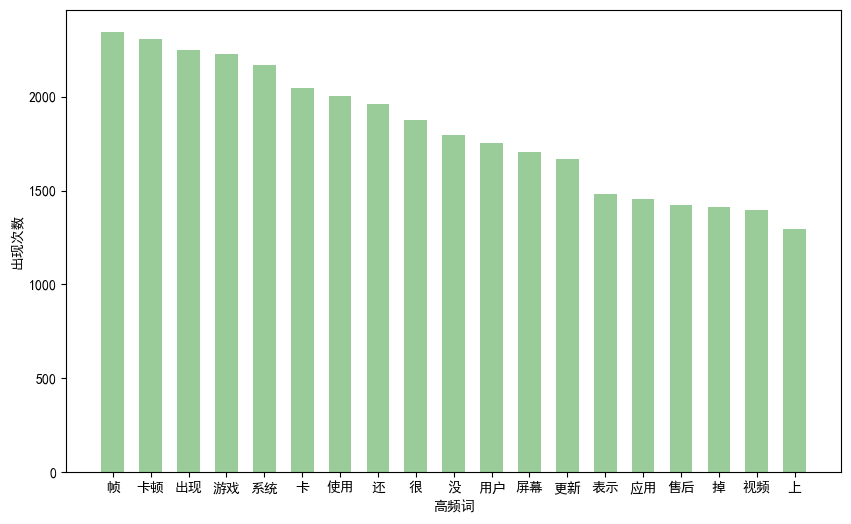

In [21]:
## ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize = (10,6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.bar(
    x = lines['all_words']
    ,height = lines['count']
    ,width = 0.6
    ,color = 'green'
    ,alpha = 0.4
)
plt.xlabel('È´òÈ¢ëËØç')
plt.ylabel('Âá∫Áé∞Ê¨°Êï∞')
plt.show()

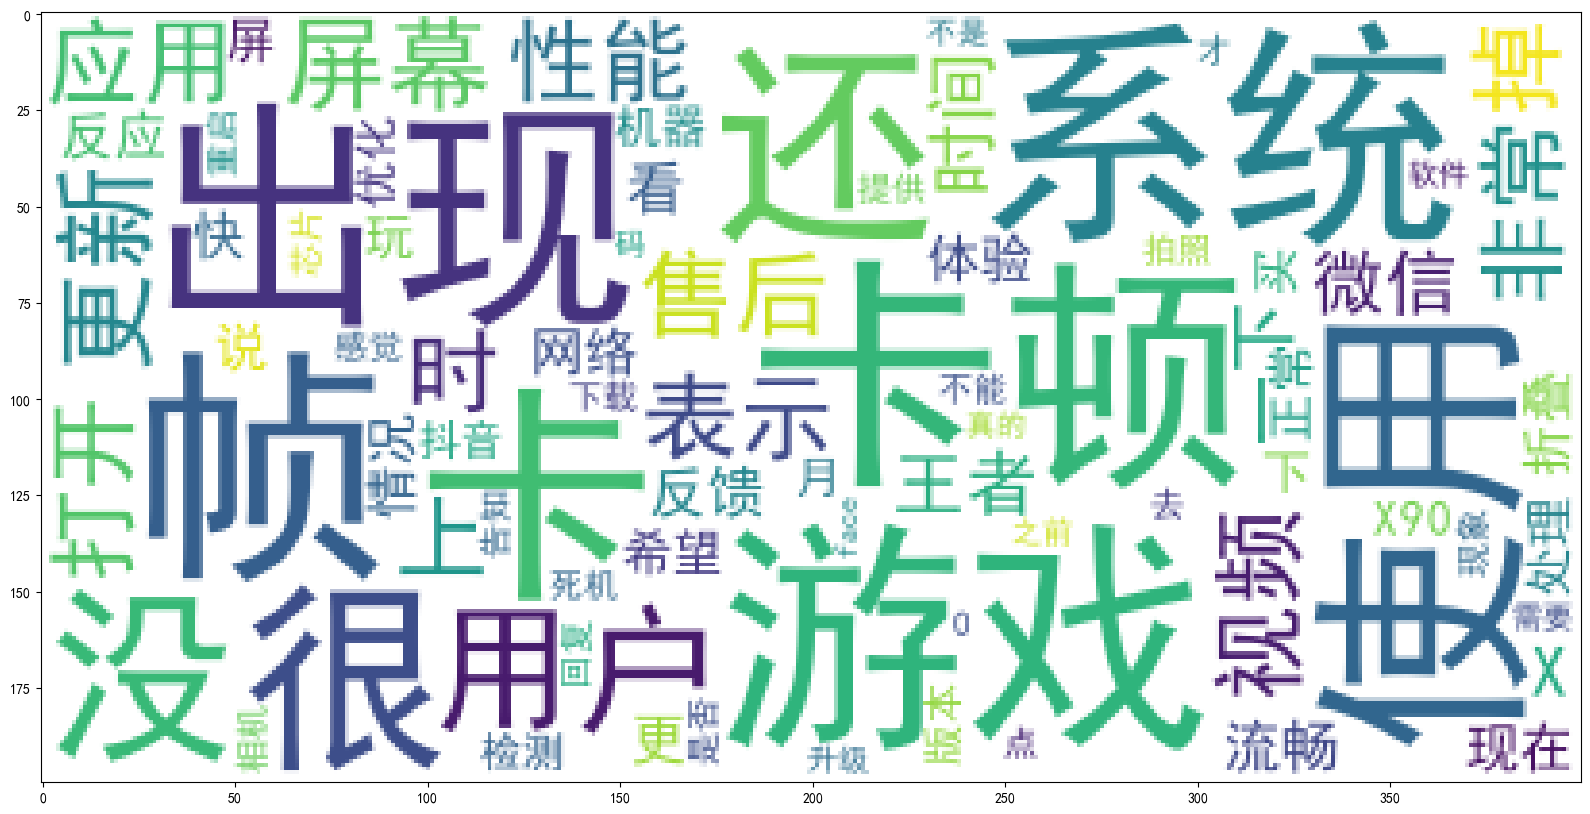

In [22]:
## ÁîüÊàêËØç‰∫ë
plt.rcParams['figure.figsize'] = (20.0,10.0)

wordcloud = WordCloud(font_path = "./data/simhei.ttf",background_color = "white",max_font_size = 120)
word_frequence = {x[0]:x[1] for x in words_count.head(80).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)